An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.  
(File renamed to "weather-data-ann-arbor.csv" for convenience.)

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

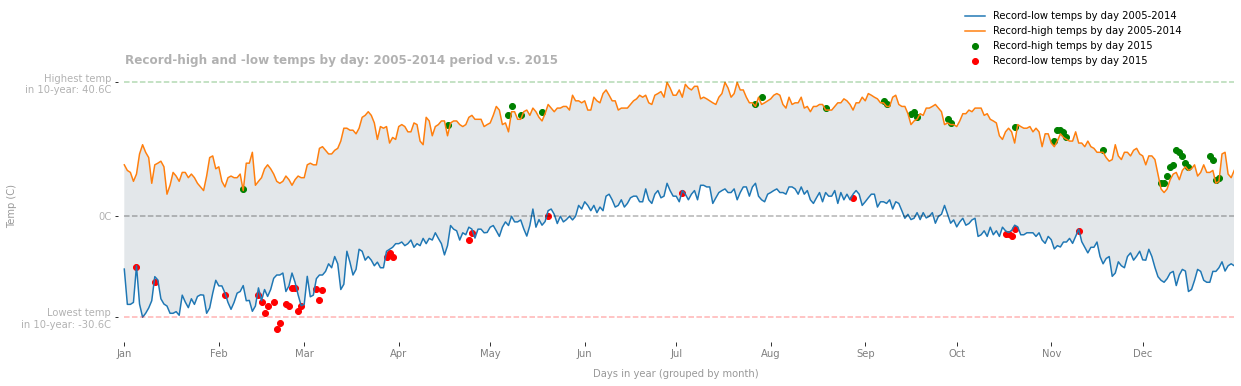

In [6]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
%matplotlib inline
import numpy as np

#1ST STEP: PREP DATA
df = pd.read_csv("weather-data-ann-arbor.csv")

#Change values to C
df["Data_Value"] = df["Data_Value"]/10
#Separate Year from Date & sort
df['Year'] = df['Date'].apply(lambda x:x[:4])
df.sort_values("Date", inplace=True)

#Create new col for 365 days of the year, remove leap year day
df["monthday"] = df['Date'].apply(lambda x:"1900"+x[4:])
df= df[df['monthday']!='1900-02-29']

#Prep dates for x axis by turning date to numerical representation with datetime
df['mdtrue']=df['monthday'].apply(lambda x:dates.date2num(datetime.strptime(x, '%Y-%m-%d')))

#Create new xticks and labels for graph
xlabels = df[['mdtrue', "monthday"]].set_index('mdtrue')
xlabels = xlabels.drop_duplicates()["monthday"]
xlabels = xlabels[xlabels.apply(lambda x: x.split('-')[2]) == '01'].index
months=["Jan", 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


#2ND STEP: CREATE CHART INPUT
#Create record-high and -low temp list by day for 2005-2014 period
record_hi=df[df["Year"]!='2015'].groupby("mdtrue")["Data_Value"].max()
record_lo=df[df["Year"]!='2015'].groupby("mdtrue")["Data_Value"].min()

#Create record-high and -low temp list by day for only 2015
record_hi_2015= (df[df["Year"]=='2015'][df["Element"]=='TMAX']
                .groupby("mdtrue")["Data_Value"].max())
record_lo_2015 = (df[df["Year"]=='2015'][df["Element"]=='TMIN']
                .groupby("mdtrue")["Data_Value"].min())

#Create filter for 2015 scatterplot overlay
filt_hi = record_hi_2015 > record_hi
filt_lo = record_lo_2015 < record_lo


#3RD STEP: DRAW CHART
plt.figure(figsize=(20,5))
#Format major y tick labels
ax = plt.gca()
mdf = dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(mdf)

#Plot line graphs for 10-year record temp, fill between record-hi and -lo
plt.plot(record_lo, label="Record-low temps by day 2005-2014")
plt.plot(record_hi, label="Record-high temps by day 2005-2014")
plt.fill_between(record_lo.index,
                record_lo, record_hi,
                facecolor="lightslategrey",
                alpha=0.2)

#Plot 2015 scatter overlay
plt.scatter(record_hi_2015[filt_hi].index, record_hi_2015[filt_hi],color="g", label="Record-high temps by day 2015")
plt.scatter(record_lo_2015[filt_lo].index, record_lo_2015[filt_lo], color='r', label="Record-low temps by day 2015")

#Add other elements, make positioning adjustments
ax.set_title("Record-high and -low temps by day: 2005-2014 period v.s. 2015", fontweight="bold", alpha=0.3)
ttl = ax.title
ttl.set_position([0.2, 1])
ax.set_xlabel("Days in year (grouped by month)", alpha=0.4, labelpad=10)
ax.set_ylabel("Temp (C)", alpha=0.4)

#Remove spines
pos = ["right", "top", "left", "bottom"]
for spine in ax.spines:
    if spine in pos:
        ax.spines[spine].set_visible(False)

#Plot guidelines for 0, min, and max temps. Turn on legend
days_in_year=len(record_lo)
x = record_lo.index
plt.plot(x,np.zeros(days_in_year),"--",color="black", alpha=0.3)
plt.plot(x,np.full((days_in_year,1),record_hi.max()),"g--", alpha=0.3)
plt.plot(x,np.full((days_in_year,1),record_lo.min()), "r--", alpha=0.3)

#Set legend
plt.legend(frameon=False, loc=(0.755,1))

#Redo x & y tick labels to be cleaner
ax.set_yticks([record_hi.max(), 0, record_lo.min()])
ax.set_yticklabels(["Highest temp\nin 10-year: %sC" %record_hi.max(), "0C", "Lowest temp\nin 10-year: %sC" %record_lo.min()], alpha=0.3)
plt.xlim([record_lo.index[0]-2, record_lo.index[-1]])
ax.set_xticks(xlabels)
ax.set_xticklabels(months, alpha=0.5)
plt.show()

Record-high and -low temperatures (in Celsius (C)) by days in year for 2005-2014 period as lines, overlaid by days with record-breaking temperatures in 2015 as scatterplot. The max and min temps for the 10-year period are also marked with dashed lines to show days where the 2015 temps break the all-time low or high record of the previous 10 years.

The following efforts were made to follow the effective visual guidelines:
- There are explanations where needed (title, y axis label, legend).
- Remove all unnecessary element ("chartjunks") e.g. spines, legend frame
- Reduce alphas of all text except legends to put focus on the graph
- Remove all unnecessary x and y tick values. Keep only the relevant ones e.g. the all-time high and low temps for the 10-year period, zero temp, and the month beginnings.
- Renamed x and y tick labels for easier understanding
- Add all-time high and low temps for 10-year period as dashed gideline for easier comparison.